In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import time

from numpy import array

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers #用正则化来防止过拟合
from tensorflow.keras.layers import Dropout # Dropout 来解决过拟合问题
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN, LSTM,GRU,Bidirectional
from tensorflow.keras import optimizers


In [87]:
df = pd.read_csv('/Users/qidongfang/Documents/learning/PRSA_Data_Changping_20130301-20170228.csv')
print(df)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0   
1          2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0   
2          3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0   
3          4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0   
4          5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   28.0  47.0   4.0  14.0  300.0   NaN   
35060  35061  2017      2   28    20   12.0  12.0   3.0  23.0  500.0  64.0   
35061  35062  2017      2   28    21    7.0  23.0   5.0  17.0  500.0  68.0   
35062  35063  2017      2   28    22   11.0  20.0   3.0  15.0  500.0  72.0   
35063  35064  2017      2   28    23   20.0  25.0   6.0  28.0  900.0  54.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM    station  
0      

In [88]:
# viewing info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [89]:
feature_column = 'wd' #确定需要处理的特征列名
classes = df[feature_column].unique() #找出特征的不同类别

In [90]:
encoder = LabelEncoder()
df[feature_column] = encoder.fit_transform(df[feature_column])#使用标签编码将特征转化为整数形式

In [91]:
print(df[feature_column]) #检查一下是否转化

0        0
1        1
2        1
3        5
4        3
        ..
35059    5
35060    3
35061    3
35062    7
35063    3
Name: wd, Length: 35064, dtype: int64


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       35064 non-null  int64  
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(6), object(1)
memory usage: 4.8+ MB


In [93]:
print(df.shape)

(35064, 18)


In [94]:
##checking how many null values are in each column
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd            0
WSPM         43
station       0
dtype: int64

In [95]:
# dropping all the rows with NaN values
df = df.dropna()

In [96]:
df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [97]:
print(df.shape)

(32774, 18)


In [98]:
train = df[:24684]
rest = df[24684:]
val = rest[:int(len(rest)*0.5)]
test = rest[int(len(rest)*0.5):]

In [99]:
X_train = train.drop(columns = {'PM2.5','station'})
y_train = train['PM2.5']

X_val = val.drop(columns = {'PM2.5','station'})
y_val = val['PM2.5']

X_test = test.drop(columns = {'PM2.5','station'})
y_test = test['PM2.5']

In [100]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(24684, 16)
(4045, 16)
(4045, 16)


In [101]:
y_train_norm = np.asarray(y_train)
y_train = np.reshape(y_train_norm,(-1,1))
scaler = MinMaxScaler(feature_range=(0,1))
y_train = scaler.fit_transform(y_train)


y_val_norm = np.asarray(y_val)
y_val = np.reshape(y_val_norm,(-1,1))
scaler = MinMaxScaler(feature_range=(0,1))
y_val = scaler.fit_transform(y_val)

y_test_norm = np.asarray(y_test)
y_test = np.reshape(y_test_norm,(-1,1))
scaler = MinMaxScaler(feature_range=(0,1))
y_test = scaler.fit_transform(y_test)

In [102]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_val = scaler.fit_transform(X_val)
x_test = scaler.fit_transform(X_test)

In [103]:
x_train_sca = x_train[:].reshape(-1,1,x_train.shape[1])
x_val_sca = x_val[:].reshape(-1,1,x_val.shape[1])
x_test_sca = x_test[:].reshape(-1,1,x_test.shape[1])

In [104]:
x_train_sca.shape

(24684, 1, 16)

RNN

In [105]:
model_rnn = tf.keras.Sequential([
        SimpleRNN(100, return_sequences = True, activation = 'relu'),
        Dropout(0.1),
        SimpleRNN(50,return_sequences=False),
        Dropout(0.1),
        Dense(1)])

In [106]:
optim = tf.optimizers.Adam(lr=0.001,clipnorm=1.)

/Users/qidongfang/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [107]:
model_rnn.compile(loss='mse',
                 optimizer = optim, metrics = ['accuracy'])

In [108]:
%%time
hist = model_rnn.fit(
         x_train_sca,y_train,
         batch_size = 128,
         epochs = 50,
         validation_data = (x_val_sca, y_val)
)

Epoch 1/50
193/193 [==============================] - 2s 4ms/step - loss: 0.0451 - accuracy: 0.0190 - val_loss: 0.0075 - val_accuracy: 0.0222
Epoch 2/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.0194 - val_loss: 0.0066 - val_accuracy: 0.0222
Epoch 3/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 0.0194 - val_loss: 0.0094 - val_accuracy: 0.0222
Epoch 4/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.0194 - val_loss: 0.0086 - val_accuracy: 0.0222
Epoch 5/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 0.0194 - val_loss: 0.0073 - val_accuracy: 0.0222
Epoch 6/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.0194 - val_loss: 0.0081 - val_accuracy: 0.0222
Epoch 7/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.0194 - val_loss: 0.0081 - val_accuracy: 0.0222
Epoch 

In [109]:
prediction  = model_rnn.predict(x_val_sca)

In [110]:
r2 = r2_score(prediction,y_val)
mse = mean_squared_error(prediction,y_val)
print(r2)
print(mse)

0.5298446245134307
0.006521599393107894


In [111]:
prediction = model_rnn.predict(x_test_sca)

In [112]:
r2 = r2_score(prediction,y_test)
mse = mean_squared_error(prediction,y_test)
print(r2)
print(mse)

0.9177153169262937
0.0013158097581953937


In [113]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


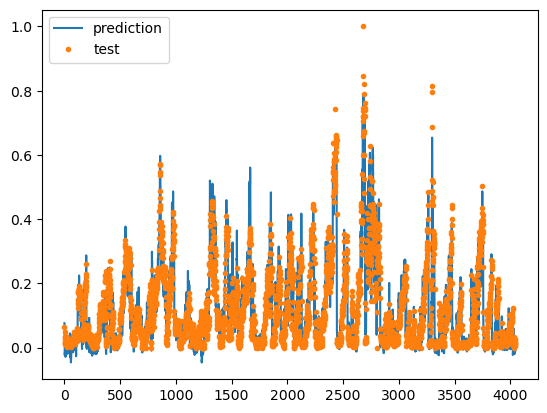

In [114]:
plt.plot(prediction)
plt.plot(y_test,'.')
plt.legend(['prediction','test'],loc = 'upper left')
plt.show()

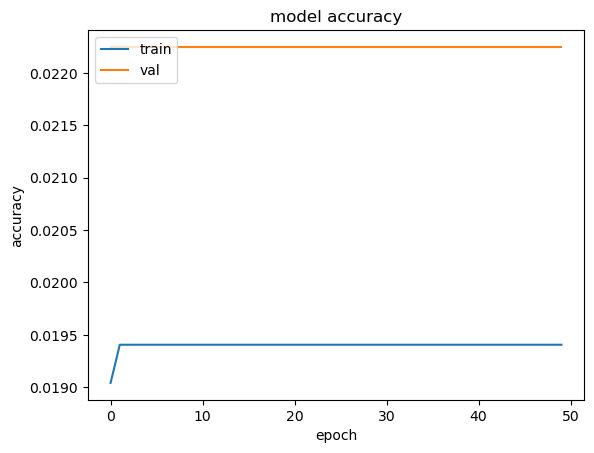

In [115]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

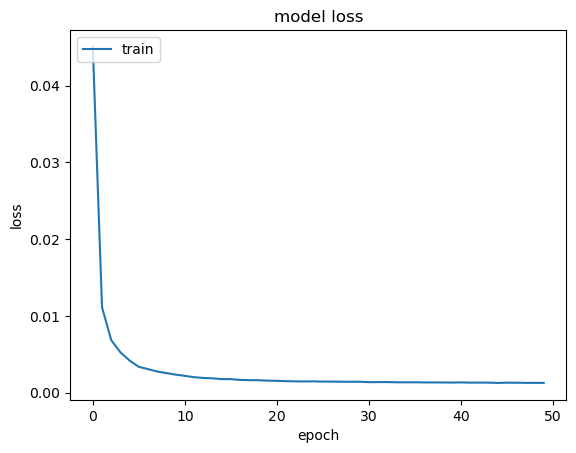

In [116]:
plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc = 'upper left')
plt.show()

In [121]:
#pd.DataFrame(prediction).to_csv('changpingrnn.csv',index = False)

In [122]:
#pd.DataFrame(hist.history['loss']).to_csv('rnnloss.csv',index = False)

# LSTM

In [123]:
model_lstm = tf.keras.Sequential([
    LSTM(100,return_sequences=True,activation='relu'),
    Dropout(0.1),
    LSTM(50,return_sequences = False),
    Dropout(0.1),
    Dense(1)
])

In [124]:
optim = tf.optimizers.Adam(lr=0.001,clipnorm=1.)

/Users/qidongfang/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [125]:
model_lstm.compile(loss='mse',
                   optimizer = optim, metrics=['accuracy']
)

In [126]:
%%time
hist_lstm = model_lstm.fit(
    x_train_sca,y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (x_val_sca,y_val)
)

Epoch 1/50
193/193 [==============================] - 4s 6ms/step - loss: 0.0040 - accuracy: 0.0194 - val_loss: 0.0066 - val_accuracy: 0.0222
Epoch 2/50
193/193 [==============================] - 1s 4ms/step - loss: 0.0017 - accuracy: 0.0194 - val_loss: 0.0068 - val_accuracy: 0.0222
Epoch 3/50
193/193 [==============================] - 1s 4ms/step - loss: 0.0015 - accuracy: 0.0194 - val_loss: 0.0069 - val_accuracy: 0.0222
Epoch 4/50
193/193 [==============================] - 1s 4ms/step - loss: 0.0015 - accuracy: 0.0194 - val_loss: 0.0060 - val_accuracy: 0.0222
Epoch 5/50
193/193 [==============================] - 1s 4ms/step - loss: 0.0014 - accuracy: 0.0194 - val_loss: 0.0062 - val_accuracy: 0.0222
Epoch 6/50
193/193 [==============================] - 1s 4ms/step - loss: 0.0013 - accuracy: 0.0194 - val_loss: 0.0062 - val_accuracy: 0.0222
Epoch 7/50
193/193 [==============================] - 1s 4ms/step - loss: 0.0013 - accuracy: 0.0194 - val_loss: 0.0063 - val_accuracy: 0.0222
Epoch 

In [127]:
prediction_lstm = model_lstm.predict(x_val_sca)

In [128]:
r2 = r2_score(prediction_lstm,y_val)
mse = mean_squared_error(prediction_lstm,y_val)
print(r2)
print(mse)

0.56342187900533
0.005566899675960496


In [129]:
prediction_lstm = model_lstm.predict(x_test_sca)

In [130]:
r2 = r2_score(prediction_lstm,y_test)
mse = mean_squared_error(prediction_lstm,y_test)
print(r2)
print(mse)

0.8970911204567946
0.0018399318011301476


In [131]:
print(hist_lstm.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


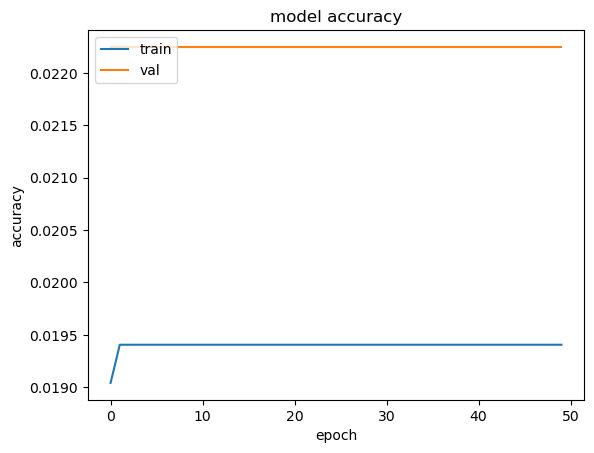

In [132]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

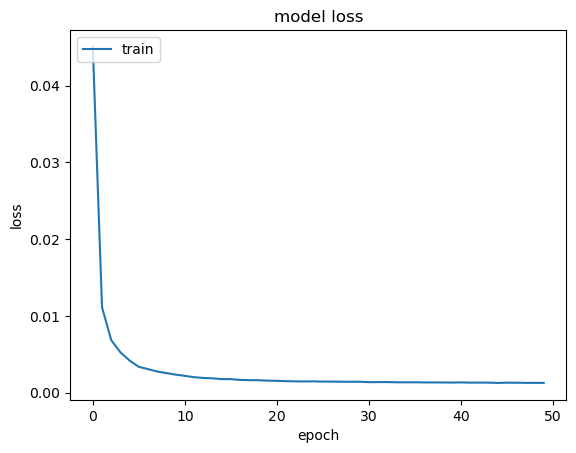

In [133]:
plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc = 'upper left')
plt.show()

In [135]:
pd.DataFrame(prediction_lstm).to_csv('changpinglstm.csv',index = False)

In [136]:
pd.DataFrame(hist_lstm.history['loss']).to_csv('lstmloss.csv',index = False)

# GRU

In [138]:
model_gru = tf.keras.Sequential([
    GRU(100,return_sequences=True,activation='relu'),
    Dropout(0.1),
    GRU(50,return_sequences=False),
    Dropout(0.1),
    Dense(1)
])

In [139]:
optim = tf.optimizers.Adam(lr=0.001,clipnorm=1.)

/Users/qidongfang/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [140]:
model_gru.compile(loss = 'mse',
                 optimizer = optim, metrics = ['accuracy'])

In [141]:
%%time
hist_gru = model_gru.fit(
    x_train_sca,y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (x_val_sca,y_val)
)

Epoch 1/50
193/193 [==============================] - 3s 6ms/step - loss: 0.0042 - accuracy: 0.0194 - val_loss: 0.0086 - val_accuracy: 0.0222
Epoch 2/50
193/193 [==============================] - 1s 5ms/step - loss: 0.0021 - accuracy: 0.0194 - val_loss: 0.0070 - val_accuracy: 0.0222
Epoch 3/50
193/193 [==============================] - 1s 5ms/step - loss: 0.0018 - accuracy: 0.0194 - val_loss: 0.0068 - val_accuracy: 0.0222
Epoch 4/50
193/193 [==============================] - 1s 4ms/step - loss: 0.0016 - accuracy: 0.0194 - val_loss: 0.0067 - val_accuracy: 0.0222
Epoch 5/50
193/193 [==============================] - 1s 3ms/step - loss: 0.0015 - accuracy: 0.0194 - val_loss: 0.0064 - val_accuracy: 0.0222
Epoch 6/50
193/193 [==============================] - 1s 3ms/step - loss: 0.0014 - accuracy: 0.0194 - val_loss: 0.0058 - val_accuracy: 0.0222
Epoch 7/50
193/193 [==============================] - 1s 4ms/step - loss: 0.0014 - accuracy: 0.0194 - val_loss: 0.0061 - val_accuracy: 0.0222
Epoch 

In [143]:
prediction_gru = model_gru.predict(x_val_sca)

In [144]:
r2 = r2_score(prediction_gru,y_val)
mse = mean_squared_error(prediction_gru,y_val)
print(r2)
print(mse)

0.48550431547845496
0.006214316110786209


In [145]:
prediction_gru = model_gru.predict(x_test_sca)

In [146]:
r2 = r2_score(prediction_gru,y_test)
mse = mean_squared_error(prediction_gru,y_test)
print(r2)
print(mse)

0.9080396451966546
0.0015967372776479608


In [147]:
print(hist_gru.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


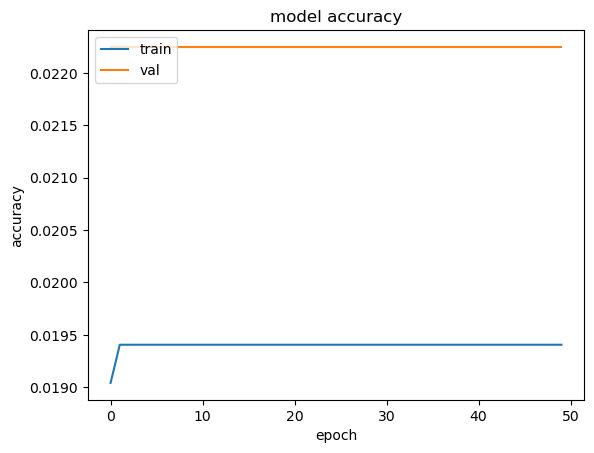

In [148]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

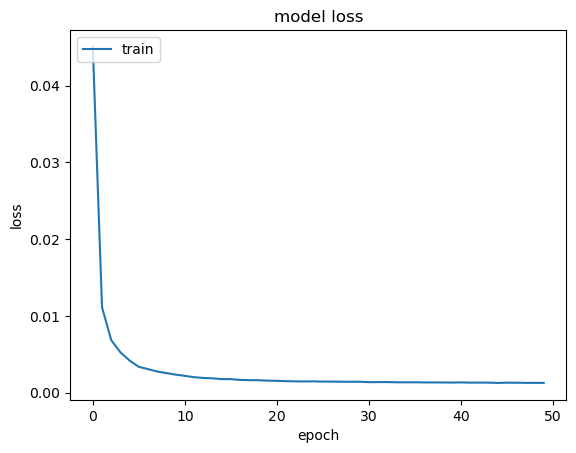

In [149]:
plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc = 'upper left')
plt.show()

In [150]:
pd.DataFrame(prediction_gru).to_csv('changpinggru.csv',index = False)

In [152]:
pd.DataFrame(hist_gru.history['loss']).to_csv('gruloss.csv',index = False)

In [153]:
model_rnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_10 (SimpleRNN)   (None, 1, 100)            11700     
                                                                 
 dropout_9 (Dropout)         (None, 1, 100)            0         
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 50)                7550      
                                                                 
 dropout_10 (Dropout)        (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 19,301
Trainable params: 19,301
Non-trainable params: 0
_________________________________________________________________


In [154]:
model_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            46800     
                                                                 
 dropout_11 (Dropout)        (None, 1, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_12 (Dropout)        (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 77,051
Trainable params: 77,051
Non-trainable params: 0
_________________________________________________________________


In [155]:
model_gru.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 1, 100)            35400     
                                                                 
 dropout_14 (Dropout)        (None, 1, 100)            0         
                                                                 
 gru_2 (GRU)                 (None, 50)                22800     
                                                                 
 dropout_15 (Dropout)        (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 58,251
Trainable params: 58,251
Non-trainable params: 0
_________________________________________________________________
